# Day 3 AM - Inferential Statistics


https://github.com/codebasics/py/blob/master/ML/FeatureEngineering/3_outlier_IQR/3_outliers_iqr.ipynb
https://github.com/codebasics/py/blob/master/ML/FeatureEngineering/2_outliers_z_score/2_outliers_z_score.ipynb


Materi ujian : mean,median, modus,range, std, hypothesis testing

Statistika inferensial adalah teknik yang dapat digunakan untuk menganalisis sekelompok kecil sampel dari data induk atau populasi untuk membuat prediksi dan kesimpulan tentang kelompok data induk atau populasi. Statistika inferensial lebih mengarah ke penarikan kesimpulan.

Generalisasi yang terkait dengan inferensi statistik tidak pasti karena didasarkan pada informasi parsial yang diperoleh dari bagian-bagian data. Jadi apa yang didapatkan hanyalah prediksi.

Data populasi dapat memiliki jutaan pengamatan, yang akan membuat kalkulasi pada keseluruhan data menjadi rumit dan lambat. Oleh karena itu, kita akan menggunakan ukuran statistik dari data sampel untuk memperkirakan atau menguji hipotesis (asumsi) tentang parameter populasi.

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Resampling

Resampling adalah suatu metode yang memungkinkan kita melakukan sampling dari data sampel, sehingga seolah-olah data hasil penelitian tersebut merupakan populasi.

Resampling adalah salah satu dari berbagai metode untuk:
- Memperkirakan ketepatan statistik sampel (median, varians, persentil),
- Bertukar label pada titik data saat melakukan uji signifikansi, dan
- Memvalidasi model dengan menggunakan himpunan bagian acak.

Resampling dalam statistik berarti perulangan. Sampel nilai dari data berulang kali diamati, dengan tujuan umum menilai variabilitas acak dalam statistik. Untuk memahami apa itu resampling, mari kita lihat harga perumahan di distribusi data (histogram) Amsterdam di bawah ini.

In [3]:
house_price = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Additional-Materials/main/HousingPrices-Amsterdam-August-2021.csv')
house_price.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


Membuat plot Price dari data House_price:

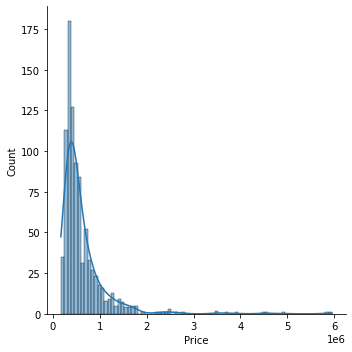

In [4]:
sns.displot(house_price.Price, kde=True, label='Housing Price in Amsterdam')

Membuat plot dengan mengambil sampel sebanyak 400:

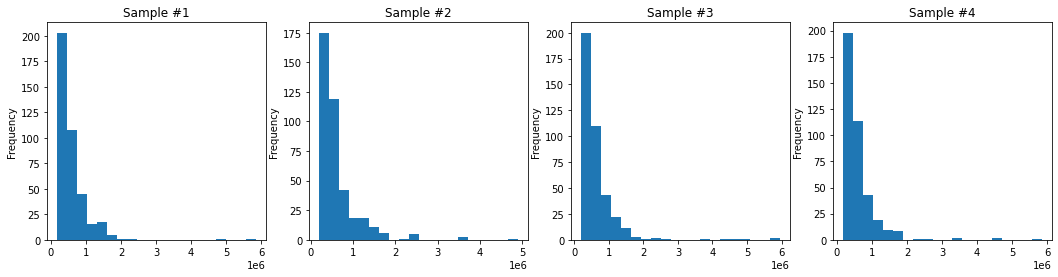

In [5]:
fig,ax = plt.subplots(ncols=4, figsize = (18,4))
for i in range(4):
  house_price.Price.sample(400).plot(kind='hist',bins=20,ax=ax[i])
  ax[i].set_title('Sample #{}'.format(i+1))

Kami mengambil 100 sampel secara acak dari data harga rumah dan kami melakukannya sebanyak 4 kali. Visualisasi menunjukkan bahwa distribusi mereka terlihat sama. Itu terjadi hanya karena data diambil secara acak/random.

## 2. Hypothesis Testing

Uji hipotesis adalah proses yang menggunakan statistik sampel untuk menguji klaim tentang nilai parameter populasi.

Para peneliti di bidang-bidang seperti kedokteran, psikologi, dan bisnis mengandalkan pengujian hipotesis untuk *membuat keputusan yang tepat* tentang obat-obatan baru, tretment, dan strategi pemasaran.

- Statement tentang parameter populasi disebut *hipotesis statistik*.
- Untuk menguji parameter populasi, Anda harus hati-hati menyatakan sepasang hipotesis. Terdapat satu yang mewakili klaim dan yang lainnya sebagai complement (pelengkapnya).
- Ketika salah satu hipotesis ini salah, yang lain harus benar.
- Jika pernyataan dalam *Null hipotesis* tidak benar, maka *hipotesis alternatif* harus benar.
- Istilah *Null hipotesis* diperkenalkan oleh Ronald Fisher.

### Pendefinisian Hypothesis

- Null hypothesis H0 adalah hipotesis statistik yang berisi pernyataan kesetaraan (equality), seperti ≤ , = , or ≥ .
- Alternative hypothesis Ha adalah komplemen dari null hypothesis. Statement ini yang harus benar jika H0 salah dan berisi pernyataan ketidaksetaraan (inequality), seperti > , ≠ , or < .
- Untuk menulis Null hipotesis dan alternatif, terjemahkan klaim yang dibuat tentang parameter populasi dari pernyataan verbal ke pernyataan matematis. Kemudian, tulis complementnya.

<img src='https://miro.medium.com/max/686/0*NzLXAr5oUg-xSOEN.png' />

**Contoh Soal**

Tulis klaim berikut sebagai pernyataan matematis. Nyatakan null hipotesis dan alternatif, dan identifikasi mana yang mewakili klaim.
1. Q1: Sebuah sekolah mengumumkan bahwa proporsi siswa yang terlibat dalam setidaknya satu kegiatan ekstrakurikuler adalah 61%.
2. Q2: Sebuah dealer mobil mengumumkan bahwa waktu rata-rata untuk penggantian oli adalah kurang dari 15 menit.
3. Q3: Sebuah perusahaan mengiklankan bahwa umur rata-rata mesin pengolah makanan dapat bertahan lebih dari 18 tahun.

**Solusi**
1. Q1: Sebuah sekolah mengumumkan bahwa proporsi siswa yang terlibat dalam setidaknya satu kegiatan ekstrakurikuler adalah 61% .
- Klaim dapat ditulis sebagai p= 0.61 .
- Complement adalah p≠0.61 .
- Karena p=0.61 berisi pernyataan kesetaraan, itu menjadi null hipotesis (H0) .
- Dalam kasus ini null hypothesis mewakili claim.

<img src='database/Q1 H02.png' />

2. Q2: Sebuah dealer mobil mengumumkan bahwa waktu rata-rata untuk penggantian
oli adalah kurang dari 15 menit.
- Klaimnya μ<15 .
- complementnya μ≥15 .
- karena μ≥15 mengandung equality, maka menjadi null hypothesis.
- Dalam kasus ini alternative hypothesis mewakili claim.

<img src='database/Q2 H0.png' />

3. Q3: Sebuah perusahaan mengiklankan bahwa umur rata-rata mesin pengolah makanan dapat bertahan lebih dari 18 tahun.
- Klaim dapat ditulis sebagai μ>18 .
- Pelengkapnya adalah μ≤18 .
- Karena μ≤18 merupakan equality, maka ini adalah null hypothesis.
- Dalam kasus ini alternative hypothesis mewakili claim.

<img src='database/Q3.png' />


## 3. Statistical Significance

Signifikansi statistik mengacu pada apakah perbedaan data yang diamati antara kelompok data yang dipelajari (apakah “real" atau apakah mereka hanya karena kebetulan).

Signifikansi statistik dihitung menggunakan nilai p, yang menunjukkan besarnya probabilitas hasil penelitian, dengan syarat
pernyataan tertentu (hipotesis nol) adalah benar.

Jika nilai p kurang dari tingkat signifikansi (α) yang telah ditentukan (umumnya 0.05), peneliti dapat menyimpulkan bahwa hipotesis nol tidak benar dan menerima hipotesis alternatif.

Contoh soal:

Misal P value dari hypothesis test adalah P=0.0237 . Apa keputusan Anda ketika tingkat signifikansinya adalah:
- Q1: α=0.05 and
- Q2: α=0.01

Solusi :

Untuk menggunakan nilai P untuk membuat keputusan dalam uji hipotesis, bandingkan nilai P dengan α .
- If P≤α , then reject H0.
- If P>α , then accept (fail to reject) H0 .

- Untuk Q1 karena 0,0237 < 0,05, kami menolak hipotesis nol.
- Untuk Q2 karena 0.0237> 0.01, kita gagal menolak hipotesis nol.
- Semakin rendah nilai P, semakin banyak bukti yang mendukung penolakan H0.
- Nilai P memberi Anda tingkat signifikansi terendah di mana statistik sampel memungkinkan Anda untuk menolak hipotesis nol.



**statistifical significance T-Test**

Langkah pertama menganalisis signifikansi statistik adalah menentukan pertanyaan penelitian yang ingin Anda jawab dan merumuskan hipotesis Anda. Hipotesis adalah pernyataan tentang data eksperimen Anda dan menerangkan perbedaan yang mungkin ada di dalam populasi penelitian. 
- Hipotesis nol (H0) umumnya menyatakan bahwa tidak ada perbedaan antara dua kelompok data. Contoh: kelompok siswa yang membaca materi sebelum kelas dimulai tidak mendapat nilai yang lebih baik dibandingkan kelompok yang tidak membaca materi.
- Hipotesis alternatif (Ha) adalah pernyataan yang berlawanan dengan hipotesis nol dan pernyataan yang Anda coba dukung dengan data eksperimen. Contoh: kelompok siswa yang membaca materi sebelum kelas mendapat nilai yang lebih baik daripada kelompok yang tidak membaca materi.


## 4. Uji Hipotesis dengan Python

Kali ini, kita akan belajar tentang pengujian hipotesis dan bagaimana menerapkannya pada kasus bisnis sehari-hari seperti ritel online. Data yang digunakan adalah dataset ML UCI https://archive.ics.uci.edu/ml/datasets/online+retail.

In [6]:
data = pd.read_excel('https://github.com/fahmimnalfrzki/Additional-Materials/blob/main/online_retail_data.xlsx?raw=true').drop(columns='Unnamed: 0').sort_values('InvoiceDate',ascending=True).reset_index(drop=True)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom
1,536373,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-01 09:02:00,2.10,17850.0,United Kingdom
2,536398,22752,SET 7 BABUSHKA NESTING BOXES,6,2010-12-01 10:52:00,8.50,13448.0,United Kingdom
3,536401,85150,LADIES & GENTLEMEN METAL SIGN,1,2010-12-01 11:21:00,2.55,15862.0,United Kingdom
4,536404,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 11:29:00,1.65,16218.0,United Kingdom
...,...,...,...,...,...,...,...,...
9995,581501,22942,CHRISTMAS LIGHTS 10 SANTAS,12,2011-12-09 10:46:00,2.95,12985.0,United Kingdom
9996,581572,22627,MINT KITCHEN SCALES,4,2011-12-09 12:08:00,8.50,16705.0,United Kingdom
9997,581578,21507,ELEPHANT BIRTHDAY CARD,12,2011-12-09 12:16:00,0.42,12713.0,Germany
9998,581579,23353,6 GIFT TAGS VINTAGE CHRISTMAS,12,2011-12-09 12:19:00,0.83,17581.0,United Kingdom


Menampilkan value_counts dari kolom stockCode:

In [7]:
data['StockCode'].value_counts()

85099B    43
85123A    40
47566     40
22423     36
20725     31
          ..
22053      1
22483      1
22103      1
84558A     1
79190A     1
Name: StockCode, Length: 2402, dtype: int64

### T-Test

Uji-T atau T-Test merupakan salah satu jenis uji statistik parametrik yang digunakan untuk menguji signifikansi dan relevansi dalam satu atau dua kelompok sampel.

Uji t pada satu kelompok memakai One sample T-Test sedangkan uji t dua kelompok dibagi menjadi dua jenis yaitu Independent Sample T-Test dan Paired Sample T-Test. Independent Sample T-Test  digunakan untuk menguji dua kelompok sample yang tidak berhubungan dan Paired Sample T-Test digunakan sebagai uji komparatif atau perbedaan apabila skala data kedua variabel adalah kuantitatif (Interval atau Rasio)

<img src='database/ttest.png' />

**1. T-Test : Single Sample Hypothesis Testing**

Misalnya, selama lima tahun terakhir, pendapatan harian kita rata-rata \$500 dan selama setahun terakhir, kita mencapai rata-rata \$580 sehari. Apakah itu berarti bahwa kita meningkat secara signifikan?

In [8]:
# Quantity dikalikan UnitPrice
data['income'] = data['Quantity']*data['UnitPrice']

# Membuat kolom date dari data InvoiceDate, hanya mengambil tangganya saja
data['date'] = data['InvoiceDate'].dt.date

# Menghitung income per date
daily_income = data[['date','income']].groupby('date').sum()

print('Average Income a Day for the last a year: ${}'.format(np.round(daily_income['income'].mean())))

Average Income a Day for the last a year: $580.0


Untuk memeriksa apakah penjualan akan meningkat secara signifikan atau tidak, kita akan melakukan sampel tunggal satu sisi (*single sample one sided*) dan menetapkan tingkat signifikansi 0,05. Kami menggunakan metode ini karena kami hanya menguji variabel dan membandingkan sampel (data satu tahun terakhir) dan populasi (kami menganggap itu adalah data lima tahun terakhir).

Hipotesis dari permasalahan ini:

**H0: μ <= \$500**

**H1: μ > \$500**

Menampilkan data daily_income:

In [9]:
daily_income

,income
date,
2010-12-01,1000.20
2010-12-02,846.13
2010-12-03,924.86
2010-12-05,592.83
2010-12-06,1853.98
...,...
2011-12-05,1574.18
2011-12-06,1006.74
2011-12-07,467.56


In [10]:
# Menghitung t_stat dan p_value

t_stat,p_val = stats.ttest_1samp(daily_income.income, 500) #kasus 1 sample
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
#p_val dibagi 2 karena one tail
#p_val two tail tidak dibagi 2
print('t-statistics:',t_stat)

P-value: 0.0028745490601192387
t-statistics: 2.781482852334568


Membuat plot daily_income_pop:

C:\Users\dedwi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


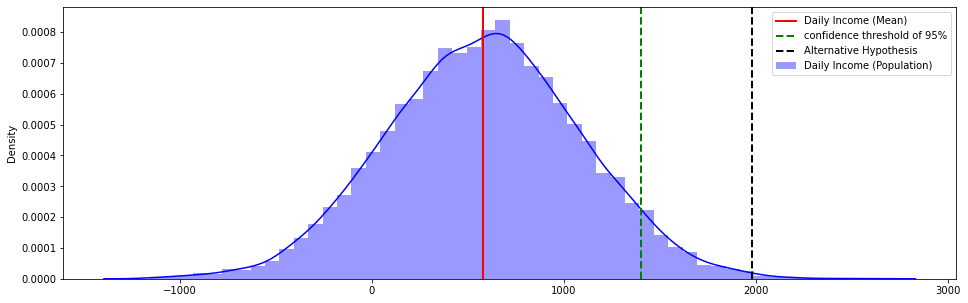

In [11]:
# Mendapatkan sampel acak dari distribusi normal
daily_income_pop = np.random.normal(daily_income.income.mean(), daily_income.income.std(), 10000)

# Mendefinisikan confidence interval = 90% untuk income mean
ci = stats.norm.interval(0.90, daily_income.income.mean(), daily_income.income.std())

# Membuat plot untuk menampilkan distribusi normal
plt.figure(figsize=(16,5))
sns.distplot(daily_income_pop, label='Daily Income (Population)', color='blue')
plt.axvline(daily_income.income.mean(), color='red', linewidth=2, label='Daily Income (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(daily_income_pop.mean() + t_stat*daily_income_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

Karena p-value kurang dari 0,05, jadi hipotesis nol ditolak dan  dapat disimpulkan bahwa, penjualan selama setahun terakhir meningkat daripada lima tahun terakhir.

Note: T-statistik mengacu pada seberapa jauh hipotesis alternatif dari hipotesis nol.

**2. T-Test : One Sample Two Tailed**

Jika H0 memiliki tanda "=" di dalamnya, itu berarti mengatakan itu adalah pengujian “dua sisi/two tailed”.

Uji dua sisi digunakan untuk menguji apakah mean yang diamati sama dengan mean yang dihipotesiskan.

Uji satu sisi digunakan untuk menguji apakah rata-rata yang diamati secara signifikan melebihi rata-rata yang dihipotesiskan atau jika secara signifikan lebih kecil daripada rata-rata yang dihipotesiskan. Jika Ha memiliki tanda “<” di dalamnya maka Ha tersebut adalah “tes arah kiri”, jika Ha memiliki tanda “>” berarti “tes sisi kanan”.

Hipotesis untuk kasus ini:

**H0: μ =\$500**

**H1: μ != \$500**

In [12]:
# Menghitung t-stat dan p-value
t_stat,p_val = stats.ttest_1samp(daily_income.income, 500)
print('P-value      :',p_val) #The p-value divided by 2 since the output is two-sided p-value
# p_val tidak dibagi karena two tail
print('t-statistics :',t_stat)

P-value      : 0.005749098120238477
t-statistics : 2.781482852334568


C:\Users\dedwi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


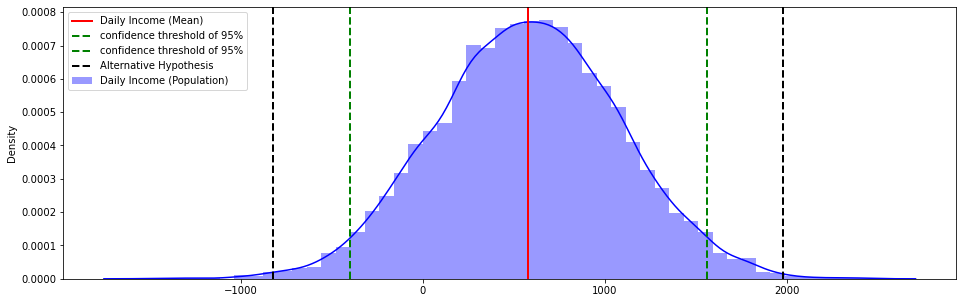

In [13]:
daily_income_pop = np.random.normal(daily_income.income.mean(), daily_income.income.std(), 10000)

ci = stats.norm.interval(0.95, daily_income.income.mean(), daily_income.income.std())

plt.figure(figsize=(16,5))
sns.distplot(daily_income_pop, label='Daily Income (Population)', color='blue')
plt.axvline(daily_income.income.mean(), color='red', linewidth=2, label='Daily Income (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(daily_income_pop.mean() + t_stat*daily_income_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(daily_income_pop.mean() - t_stat*daily_income_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

**Dua Sampel Uji Hipotesis Dua Sisi Independen**

Sekarang, kami ingin memeriksa, apakah rata-rata harian penjualan dua negara berbeda secara signifikan atau tidak, menggunakan dua sampel uji dua arah yang independen. Kami akan memilih sampel Perancis dan Jerman.

In [14]:
# filtering income dan date di groupby berdasarkan date dan nilainya hanya pada country tertentu
daily_france  = data[data['Country']=='France'] [['date','income']].groupby('date').sum()
daily_germany = data[data['Country']=='Germany'][['date','income']].groupby('date').sum()

# np.round untuk menghilangkan angka dibelakang koma
print('Average sales of France a day : ${}'.format(np.round(daily_france.income.mean())))
print('Average sales of Germany a day: ${}'.format(np.round(daily_germany.income.mean())))

Average sales of France a day : $32.0
Average sales of Germany a day: $37.0


In [15]:
daily_france.head()

,income
date,
2010-12-05,210.75
2010-12-07,30.60
2010-12-15,9.40
2011-01-05,49.50
2011-01-06,15.95


Hipotesis dalam kasus ini:

**H0: μ_france = μ_germany**

**H1: μ_france != μ_germany**

In [16]:
# Menghitung t-stat dan p-value
t_stat, p_val = stats.ttest_ind(daily_france,daily_germany)
print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 0.42798052232930384
t-statistics: -0.7943449043302956


C:\Users\dedwi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dedwi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


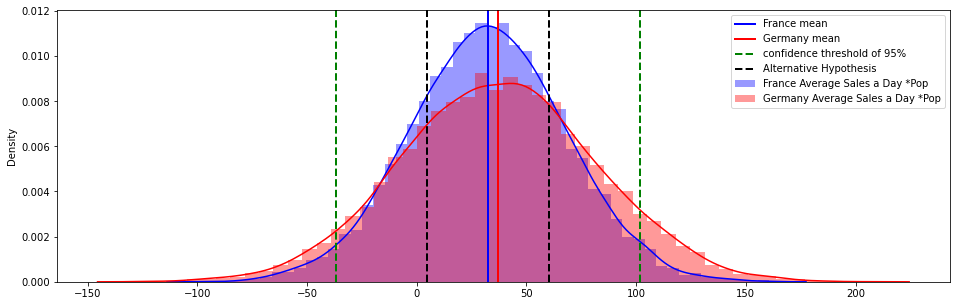

In [17]:
france_pop = np.random.normal(daily_france.income.mean(),daily_france.income.std(),10000)
germany_pop = np.random.normal(daily_germany.income.mean(),daily_germany.income.std(),10000)

ci = stats.norm.interval(0.95, daily_france.income.mean(), daily_france.income.std())
plt.figure(figsize=(16,5))
sns.distplot(france_pop, label='France Average Sales a Day *Pop',color='blue')
sns.distplot(germany_pop, label='Germany Average Sales a Day *Pop',color='red')

plt.axvline(daily_france.income.mean(), color='blue', linewidth=2, label='France mean')
plt.axvline(daily_germany.income.mean(), color='red',  linewidth=2, label='Germany mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(france_pop.mean()+t_stat[0]*france_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(france_pop.mean()-t_stat[0]*france_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Berdasarkan hasil di atas, kita dapat menyimpulkan bahwa kita menerima hipotesis nol bahwa antara Perancis dan Jerman tidak berbeda secara signifikan dalam hal penjualan rata-rata per hari.

## ANOVA

ANOVA is similar to the t-test. It used for testing whether more than two variables are significantly different or not. So, we will test whether the mean of daily sales of IEV,N8U, and U5F are significantly different or not.

In [18]:
scanner_data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Additional-Materials/main/scanner_data.csv')
scanner_data

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...,...
131701,131702,04/07/2016,20203,32900,IEV,FO112,3.0,6.46
131702,131703,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50
131703,131704,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19
131704,131705,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57


In [19]:
scanner_data.groupby('Date').sum()

,Unnamed: 0,Customer_ID,Transaction_ID,Quantity,Sales_Amount
Date,,,,,
01/02/2016,3923150,1620617,1896805,482.75,4341.46
01/03/2016,7432990,1616766,3579179,497.00,4436.42
01/04/2016,14016165,4846347,6867307,553.00,4637.34
01/05/2016,7644374,1820535,3779664,217.00,1514.17
01/06/2016,19708741,5149729,9793228,572.66,4750.01
...,...,...,...,...,...
31/05/2016,19960359,5266971,9915835,522.00,4186.64
31/07/2016,16666761,1896920,4742452,169.00,1341.96
31/08/2016,24788181,4674456,13660542,477.67,3955.78


In [20]:
IEV_quantity = scanner_data[scanner_data.SKU_Category == 'IEV'].groupby('Date').sum()['Quantity']
N8U_quantity = scanner_data[scanner_data.SKU_Category == 'N8U'].groupby('Date').sum()['Quantity']
U5F_quantity = scanner_data[scanner_data.SKU_Category == 'U5F'].groupby('Date').sum()['Quantity']

print("Daily Average of IEV",IEV_quantity.mean())
print("Daily Average of N8U",N8U_quantity.mean())
print("Daily Average of U5F",U5F_quantity.mean())

Daily Average of IEV 22.915254237288135
Daily Average of N8U 33.46556473829201
Daily Average of U5F 22.610340909090908


Tampaknya mereka berbeda secara signifikan karena rata-rata N8U adalah 33 detik dan sisanya adalah 22 detik.

In [21]:
f_stat,p_value = stats.f_oneway(IEV_quantity, N8U_quantity, U5F_quantity)
print('P-value:', p_value)
print('F-statistics:',f_stat)

P-value: 6.049412282955515e-36


karena p-value di bawah 0,05, maka kami menyimpulkan bahwa perbedaan IEV, N8U, dan U5F signifikan secara statistik.

## Paired Test
**Implementation on A/B Testing**

Kami sedang berurusan dengan divisi pemasaran perusahaan pengembang game untuk menganalisis versi game mana yang cenderung memberikan lebih banyak tingkat retensi? Benarkah kita mengupgrade game kita dari versi gate 30 ke gate 40? (Data dari https://www.kaggle.com/yufengsui/mobile-games-ab-testing) Kami akan menggunakan data retention_1 yang menangkap informasi bahwa pemain kembali dan bermain 1 hari setelah menginstal.

In [22]:
cookie_cats = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Additional-Materials/main/cookie_cats.csv')
cookie_cats

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [23]:
gate_30 = cookie_cats[cookie_cats['version']=='gate_30']['retention_1'].replace({True:1,False:0})
gate_40 = cookie_cats[cookie_cats['version']=='gate_40']['retention_1'].replace({True:1,False:0})

print('Retention rate of gate 30 version:',gate_30.sum()/gate_30.count())
print('Retention rate of gate 40 version:',gate_40.sum()/gate_40.count())

Retention rate of gate 30 version: 0.4481879194630872
Retention rate of gate 40 version: 0.44228274967574577


In [24]:
gate_30

0        0
1        1
6        0
11       0
13       1
        ..
90179    1
90180    0
90182    1
90183    0
90186    1
Name: retention_1, Length: 44700, dtype: int64

In [25]:
gate_40

2        1
3        0
4        1
5        1
7        0
        ..
90181    1
90184    1
90185    0
90187    1
90188    0
Name: retention_1, Length: 45489, dtype: int64

The retention rate between those versions is slightly different. Is the difference truly the same or because of chance?

To make sure of our result, we will check using paired test two sided.

Our hypothesis on this case:

**H0: μ_gate30 = μ_gate40**

**H1: μ_gate30 != μ_gate40**

In [26]:
t_stat,p_val = stats.ttest_rel(gate_30.sample(40000),gate_40.sample(40000)) #we take 40000 sample of each data to make the size the same.
print('P-value:',p_val)

P-value: 0.16238840360531354


Karena nilai p lebih dari 0,05, kami menyimpulkan bahwa kami menerima hipotesis Null yang berarti antara versi gerbang 30 dan 40 adalah sama. Kami dengan aman meningkatkan game kami ke versi gerbang 40.

## Chi-Square Test

Uji chi-kuadrat digunakan untuk menguji independensi antara dua data kategorikal. Karena statistik menangani data numerik, kita perlu menghitung frekuensi setiap variabel dan disajikan dengan tabel kontingensi.

In [27]:
chi_df=pd.read_csv('https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/chi-test.csv')
chi_df

,Gender,Like Shopping?
0,Male,No
1,Female,Yes
2,Male,Yes
3,Female,Yes
4,Female,Yes
5,Male,Yes
6,Male,No
7,Female,No
8,Female,No


In [28]:
contingency_table=pd.crosstab(chi_df["Gender"],chi_df["Like Shopping?"])
contingency_table

Like Shopping?,No,Yes
Gender,,
Female,2,3
Male,2,2


In [29]:
stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p=1.000
Probably independent
